<div style="text-align:center">
    <h1>
        SARSA
    </h1>
</div>

<br><br>

<div style="text-align:center">
    In this notebook we are going to implement a method that learns from experience and uses bootstrapping.
    It is known as SARSA because of the elements involved in the update rule:
</div>

\begin{equation}
\text{State}_t, \text{Action}_t, \text{Reward}_t, \text{State}_{t+1}, \text{Action}_{t+1}
\end{equation}

<br>

<div style="text-align:center">
    This method follows an on-policy strategy, in which the same policy that is optimized is responsible for scanning the environment.
</div>


<br>



<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 5 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Create the environment, value table and policy

#### Create the environment

In [4]:
env = Maze()

#### Create the $Q(s, a)$ table

In [5]:
action_values = np.zeros((5, 5, 4)) # ie s= 5x5 states and a= 4 actions

In [6]:
action_values[(0,1)]

array([0., 0., 0., 0.])

#### Create the policy $\pi(s)$

In [12]:
#e-greedy policy This means is that the policy with probability Epsilon will pick a random action and with probability
#one minus Epsilon, it will pick the action with the highest estimated q-value.

def policy(state, epsilon=.2):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av==av.max())) #if there's a tie btw 2 actions it'll break the tie randomly

#### Plot the value table $Q(s,a)$

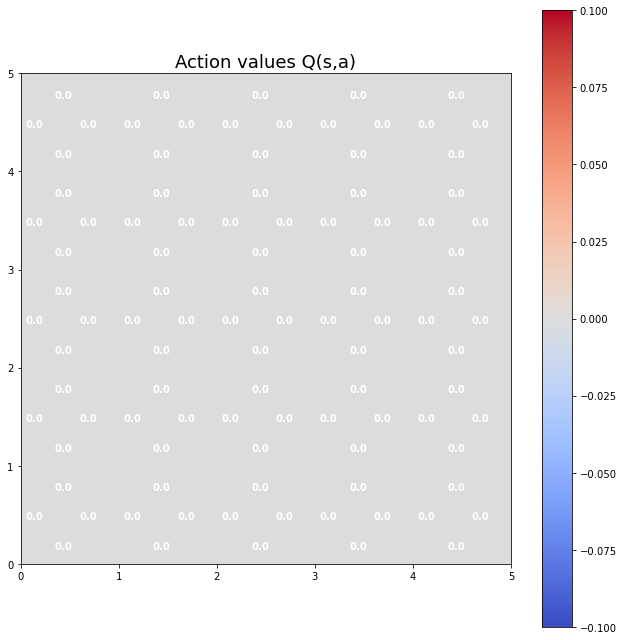

In [5]:
plot_action_values(action_values)

#### Plot the policy

D:\Users\apytl\AppData\Anaconda3\envs\bmrl\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


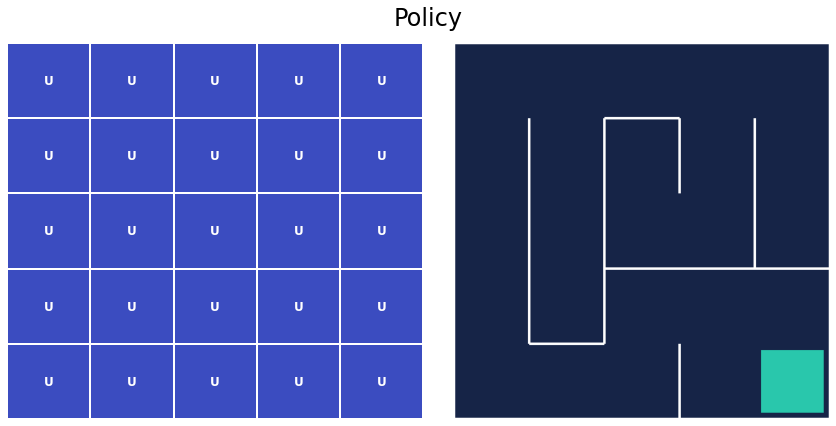

In [6]:
plot_policy(action_values, env.render(mode='rgb_array'))

## Implement the algorithm

</br>

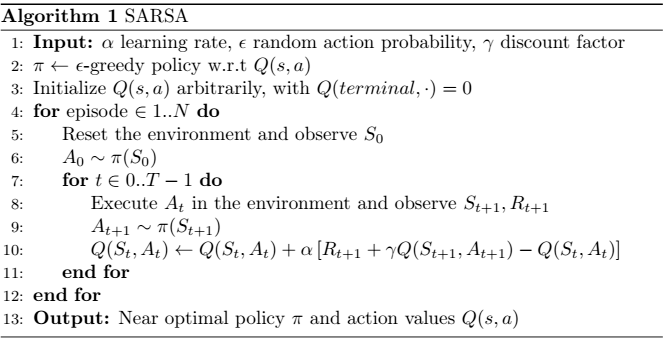

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [13]:
def sarsa(action_values, policy, episodes, alpha=.1, gamma=.99, epsilon=0.2):
    
    for episode in range(1, episodes + 1):
        state =  env.reset()
        action = policy(state, epsilon)
        done = False # to tell us if the episode is done or not
        
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon)
            
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha *(reward + gamma * next_qsa - qsa)
            
            state = next_state
            action  = next_action
         
    

In [14]:
sarsa(action_values, policy, 10000)

## Show results

#### Show resulting value table $Q(s,a)$

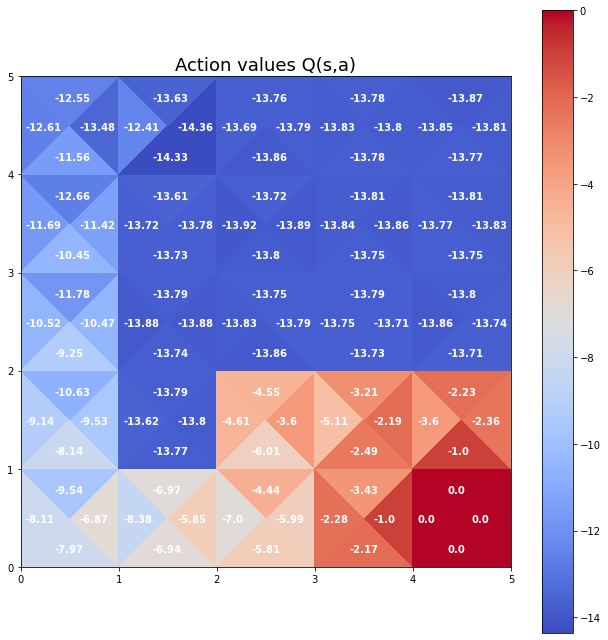

In [15]:
plot_action_values(action_values)

In [ ]:
# As you can see, the accident with the highest value are the ones that take us straight to the goal.
#But since the agent sometimes picks a random action, it has also explored state elections that are, not on the optimal path.

#### Show resulting policy $\pi(\cdot|s)$

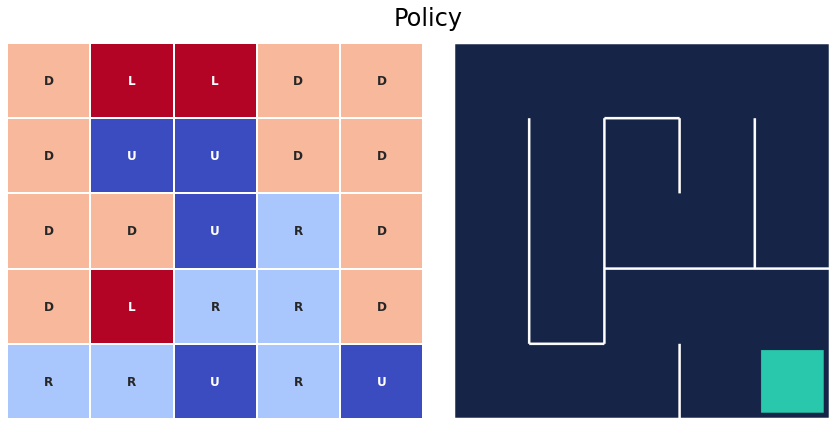

In [16]:
plot_policy(action_values, env.render(mode='rgb_array'))

In [17]:
#As you can see, the policy is optimal in the states that lead to the goal.
# They also focus their effots on states and actions that seem more promissing

#### Test the resulting agent

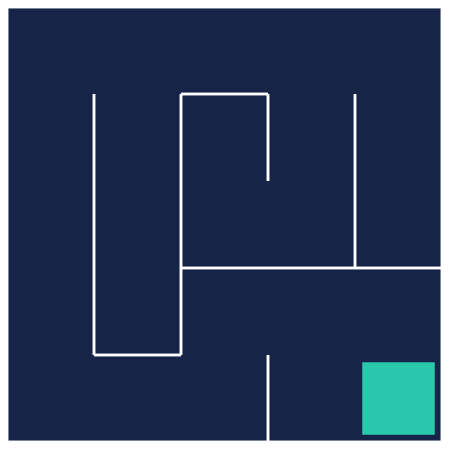

In [18]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 6: Temporal difference learning](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)